<a href="https://colab.research.google.com/github/Annapoornaaradhya/Hello-ML-World/blob/main/Naive_Bayes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Classification Report (Test size: 10%) ---
               precision    recall  f1-score   support

     business       1.00      1.00      1.00        20
entertainment       1.00      1.00      1.00        20
     politics       1.00      1.00      1.00        20
        sport       1.00      1.00      1.00        20
   technology       1.00      1.00      1.00        20

     accuracy                           1.00       100
    macro avg       1.00      1.00      1.00       100
 weighted avg       1.00      1.00      1.00       100


--- Classification Report (Test size: 20%) ---
               precision    recall  f1-score   support

     business       1.00      1.00      1.00        40
entertainment       1.00      1.00      1.00        40
     politics       1.00      1.00      1.00        40
        sport       1.00      1.00      1.00        40
   technology       1.00      1.00      1.00        40

     accuracy                           1.00       200
    macro avg      

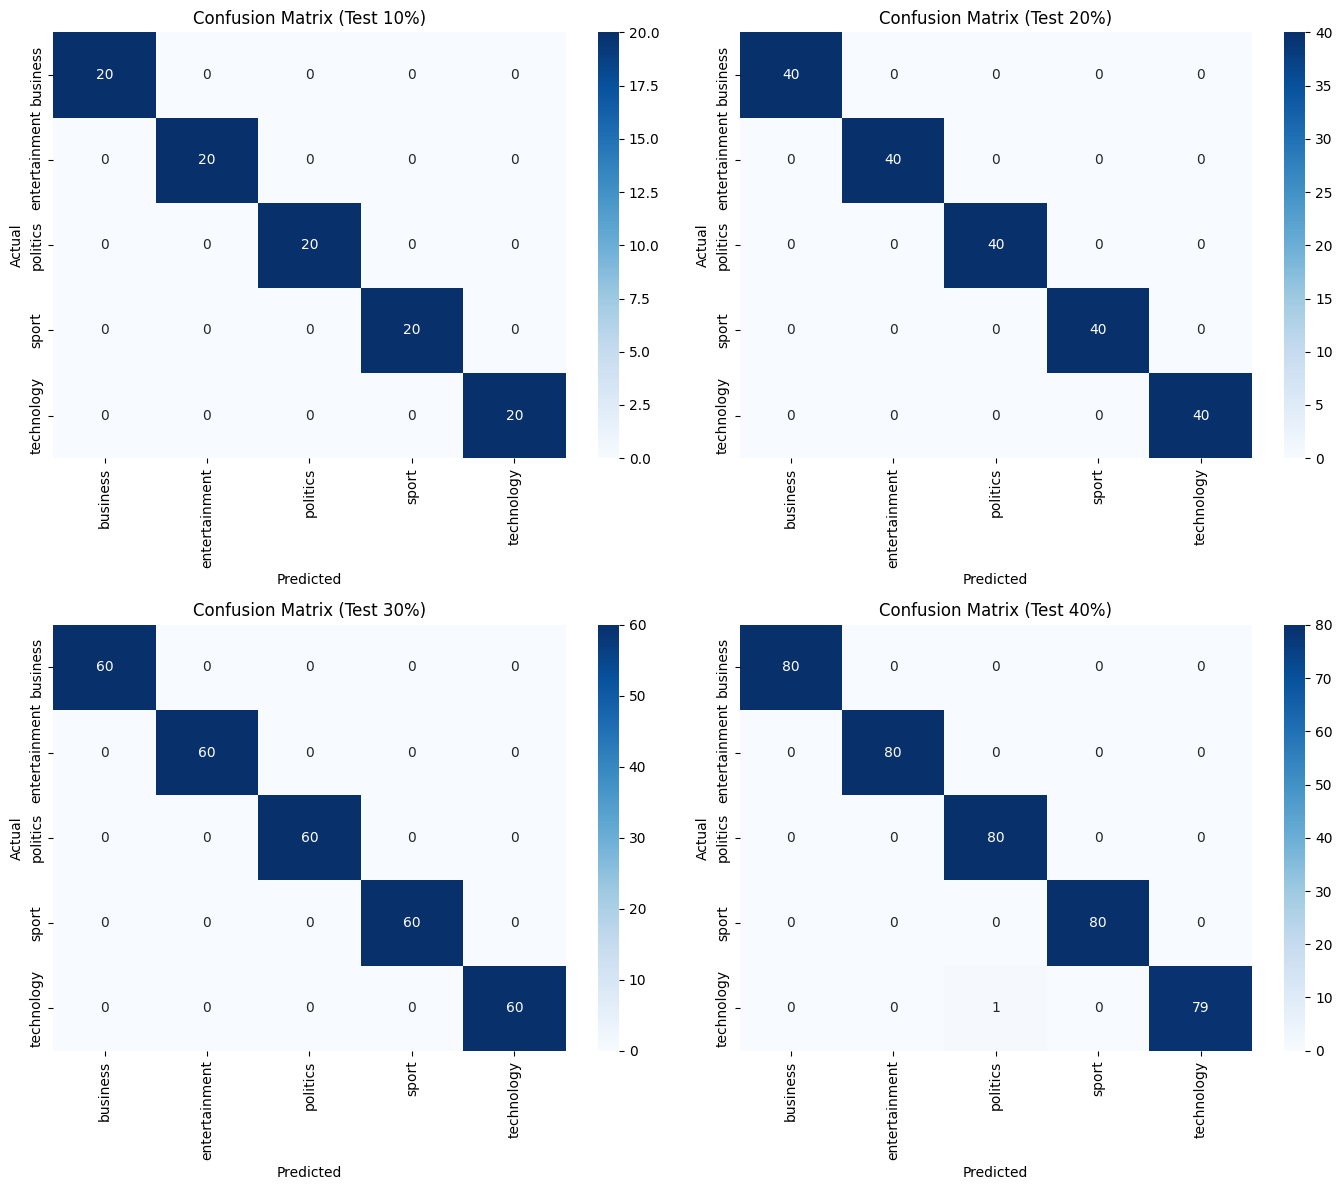

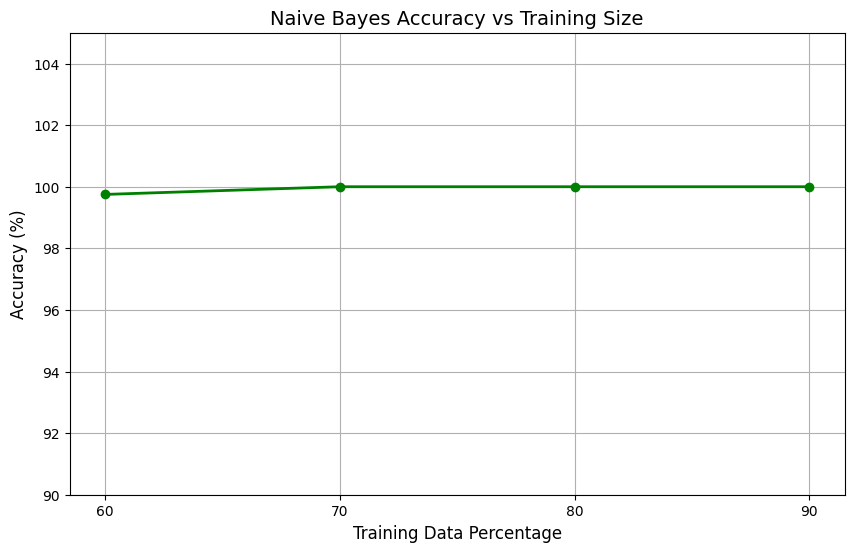

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("/content/unique_text_dataset.csv")  # Adjust path if needed

# Define test split ratios
split_ratios = [0.1, 0.2, 0.3, 0.4]
accuracies = []
labels = sorted(df["category"].unique())

# Create subplots for confusion matrices
fig_cm, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

for idx, test_size in enumerate(split_ratios):
    X_train, X_test, y_train, y_test = train_test_split(
        df["text"], df["category"],
        test_size=test_size, stratify=df["category"], random_state=42
    )

    model = make_pipeline(
        TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_df=0.95),
        MultinomialNB(alpha=0.1)
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracies.append(report["accuracy"] * 100)

    # Print report
    print(f"\n--- Classification Report (Test size: {int(test_size * 100)}%) ---")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axs[idx])
    axs[idx].set_title(f"Confusion Matrix (Test {int(test_size*100)}%)")
    axs[idx].set_xlabel("Predicted")
    axs[idx].set_ylabel("Actual")

# Adjust layout
plt.tight_layout()
plt.show()

# Plot Accuracy vs Training %
train_sizes = [int((1 - s) * 100) for s in split_ratios]
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, accuracies, marker='o', color='green', linewidth=2)
plt.title("Naive Bayes Accuracy vs Training Size", fontsize=14)
plt.xlabel("Training Data Percentage", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.grid(True)
plt.xticks(train_sizes)
plt.ylim(90, 105)
plt.show()


🔄 Loading dataset...
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
✅ Dataset loaded with 400 samples and 4096 features.
🔹 Training set size: 280 | Test set size: 120

🔍 Applying PCA...

📊 Classification Report (PCA + Naive Bayes):
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       1.00      1.00      1.00         3
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         3
           4       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       0.75      1.00      0.86         3
      

<ipython-input-1-88be7c131843>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=methods, y=accuracies, palette='Set2')


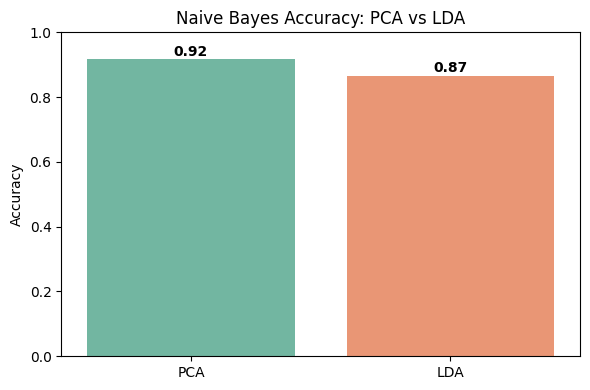

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Load the Olivetti Face dataset
print("🔄 Loading dataset...")
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X = faces.data         # Shape: (400, 4096)
y = faces.target       # Shape: (400,)

print(f"✅ Dataset loaded with {X.shape[0]} samples and {X.shape[1]} features.")

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
print(f"🔹 Training set size: {X_train.shape[0]} | Test set size: {X_test.shape[0]}")

# ============================================================= #
# ===============  PCA with Naive Bayes Model  ================ #
# ============================================================= #

print("\n🔍 Applying PCA...")

# Step 3: Apply PCA — selecting 100 components for high variance capture
pca = PCA(n_components=100, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 4: Train Naive Bayes on PCA-reduced data
nb_pca = GaussianNB()
nb_pca.fit(X_train_pca, y_train)

# Step 5: Predict and evaluate
y_pred_pca = nb_pca.predict(X_test_pca)
print("\n📊 Classification Report (PCA + Naive Bayes):")
print(classification_report(y_test, y_pred_pca))
print("✅ PCA Accuracy:", accuracy_score(y_test, y_pred_pca))

# ============================================================= #
# ===============  LDA with Naive Bayes Model  ================ #
# ============================================================= #

print("\n🔍 Applying LDA...")

# Step 6: Apply LDA — max components = n_classes - 1 = 40 - 1 = 39
lda = LDA(n_components=39)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Step 7: Train Naive Bayes on LDA-reduced data
nb_lda = GaussianNB()
nb_lda.fit(X_train_lda, y_train)

# Step 8: Predict and evaluate
y_pred_lda = nb_lda.predict(X_test_lda)
print("\n📊 Classification Report (LDA + Naive Bayes):")
print(classification_report(y_test, y_pred_lda))
print("✅ LDA Accuracy:", accuracy_score(y_test, y_pred_lda))

# ============================================================= #
#  Visual comparison of accuracy
# ============================================================= #

import seaborn as sns

methods = ["PCA", "LDA"]
accuracies = [accuracy_score(y_test, y_pred_pca), accuracy_score(y_test, y_pred_lda)]

plt.figure(figsize=(6, 4))
sns.barplot(x=methods, y=accuracies, palette='Set2')
plt.title("Naive Bayes Accuracy: PCA vs LDA")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()
